# Machine Learning USA - Pre-Processamento

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
accident_df = pd.read_csv('Data/accident.csv')

person_df = pd.read_csv('Data/person.csv')

vehicle_df = pd.read_csv('Data/vehicle.csv', encoding='ISO-8859-1')

C:\Users\flavi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Accident:",accident_df.shape)

print("Person:",person_df.shape)

print("Vehicle:",vehicle_df.shape)

Accident: (32538, 52)
Person: (81620, 68)
Vehicle: (49478, 102)


# Análise das Bases

### Accident

In [4]:
accident_df.isnull().sum().sort_values(ascending=False)

TWAY_ID2      24008
DRUNK_DR          0
FATALS            0
TWAY_ID           0
ROUTE             0
RD_OWNER          0
FUNC_SYS          0
RUR_URB           0
NHS               0
MINUTE            0
HOUR              0
DAY_WEEK          0
YEAR              0
MONTH             0
DAY               0
CITY              0
COUNTY            0
PERSONS           0
PERMVIT           0
PERNOTMVIT        0
PEDS              0
PVH_INVL          0
VE_FORMS          0
VE_TOTAL          0
ST_CASE           0
MILEPT            0
LATITUDE          0
LONGITUD          0
SCH_BUS           0
CF3               0
CF2               0
CF1               0
HOSP_MN           0
HOSP_HR           0
ARR_MIN           0
ARR_HOUR          0
NOT_MIN           0
NOT_HOUR          0
RAIL              0
WEATHER           0
SP_JUR            0
WEATHER2          0
WEATHER1          0
LGT_COND          0
REL_ROAD          0
WRK_ZONE          0
TYP_INT           0
RELJCT2           0
RELJCT1           0
MAN_COLL          0


Os campos TWAY e TWAY_ID2 trazem o nome da via e segunda via (para os casos em que o acidente ocorreu em cruzamentos de vias), respectivamente. O dataset já possui outros campos que trazem informações da localização, como Latitude e Longitude. Portanto, por se tratarem de features não numéricas e apresentarem grande quantidade de valores nulos (TWAY_ID2) serão descartadas.

In [5]:
del accident_df['TWAY_ID']
del accident_df['TWAY_ID2']

### Person

In [6]:
person_df.isnull().sum().sort_values(ascending=False)[:50]

MAKE        7064
IMPACT1     7064
BODY_TYP    7064
MOD_YEAR    7064
TOW_VEH     7064
SPEC_USE    7064
EMER_USE    7064
ROLLOVER    7064
FIRE_EXP    7064
MAK_MOD     7064
RACE           0
AGE            0
SEX            0
PER_TYP        0
INJ_SEV        0
SEAT_POS       0
REST_USE       0
LOCATION       0
SCH_BUS        0
MAN_COLL       0
HARM_EV        0
FUNC_SYS       0
RUR_URB        0
MINUTE         0
HOUR           0
MONTH          0
DAY            0
COUNTY         0
STR_VEH        0
PER_NO         0
VEH_NO         0
VE_FORMS       0
ST_CASE        0
REST_MIS       0
AIR_BAG        0
EJECTION       0
HOSPITAL       0
HISPANIC       0
WORK_INJ       0
P_SF3          0
P_SF2          0
P_SF1          0
LAG_MINS       0
LAG_HRS        0
DEATH_TM       0
DEATH_MN       0
DEATH_HR       0
DEATH_YR       0
DEATH_MO       0
DEATH_DA       0
dtype: int64

In [18]:
person_df.loc[person_df['MAKE'].isnull()]

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
74556,1,10008,1,0,1,1,73,3,1,21,...,2348,2,18,0,0,0,0,7,2,11
74557,1,10031,1,0,1,1,93,24,1,16,...,1830,1,52,0,0,0,0,7,1,3
74558,1,10040,1,0,1,1,73,20,1,15,...,1637,0,40,9,0,0,1,7,1,11
74559,1,10042,1,0,1,1,125,31,1,18,...,1845,0,0,0,0,0,0,1,1,11
74560,1,10050,1,0,1,1,97,31,1,4,...,450,0,0,0,0,0,0,7,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81615,56,560031,18,0,1,10,1,20,4,7,...,8888,999,99,0,0,0,8,0,0,98
81616,56,560042,1,0,1,1,13,22,5,15,...,1519,0,0,0,0,0,0,1,1,1
81617,56,560048,1,0,1,1,5,3,6,2,...,220,0,0,0,0,0,0,7,1,11
81618,56,560052,1,0,1,1,7,18,6,17,...,1750,0,0,0,0,0,1,7,1,25


Uma análise entre as bases Person e Vehicle permite identificar que os 10 campos com valores nulos da base Person também estão presentes na base Vehicle, e totalmente preenchidos. Desta forma, descartamos estes campos vindos da base Person.

In [7]:
del person_df['MAKE']
del person_df['IMPACT1']
del person_df['BODY_TYP']
del person_df['MOD_YEAR']
del person_df['TOW_VEH']
del person_df['SPEC_USE']
del person_df['EMER_USE']
del person_df['ROLLOVER']
del person_df['FIRE_EXP']
del person_df['MAK_MOD']

In [8]:
person_df.isnull().sum().sort_values(ascending=False)[:50]

LOCATION      0
MAN_COLL      0
EXTRICAT      0
EJ_PATH       0
EJECTION      0
AIR_BAG       0
REST_MIS      0
REST_USE      0
SEAT_POS      0
INJ_SEV       0
PER_TYP       0
SEX           0
AGE           0
SCH_BUS       0
HARM_EV       0
RACE          0
FUNC_SYS      0
RUR_URB       0
MINUTE        0
HOUR          0
MONTH         0
DAY           0
COUNTY        0
STR_VEH       0
PER_NO        0
VEH_NO        0
VE_FORMS      0
ST_CASE       0
DRINKING      0
ALC_DET       0
ALC_STATUS    0
ATST_TYP      0
HISPANIC      0
WORK_INJ      0
P_SF3         0
P_SF2         0
P_SF1         0
LAG_MINS      0
LAG_HRS       0
DEATH_TM      0
DEATH_MN      0
DEATH_HR      0
DEATH_YR      0
DEATH_MO      0
DEATH_DA      0
DOA           0
HOSPITAL      0
DRUGRES3      0
DRUGRES2      0
DRUGRES1      0
dtype: int64

### Vehicle

In [9]:
vehicle_df.isnull().sum().sort_values(ascending=False)[:50]

VIN_12      167
VIN_11      131
VIN_10      103
VIN_9        50
VIN_8        28
VIN_7         8
VIN_6         2
MCARR_ID      0
TOW_VEH       0
J_KNIFE       0
MCARR_I1      0
MCARR_I2      0
DR_DRINK      0
VIN_5         0
V_CONFIG      0
CARGO_BT      0
HAZ_INV       0
HAZ_PLAC      0
HAZ_ID        0
HAZ_CNO       0
HAZ_REL       0
BUS_USE       0
SPEC_USE      0
EMER_USE      0
GVWR          0
VIN_4         0
DEATHS        0
UNITTYPE      0
ST_CASE       0
VEH_NO        0
VE_FORMS      0
NUMOCCS       0
DAY           0
MONTH         0
HOUR          0
MINUTE        0
HARM_EV       0
MAN_COLL      0
HIT_RUN       0
VIN_3         0
REG_STAT      0
OWNER         0
MAKE          0
MODEL         0
MAK_MOD       0
BODY_TYP      0
MOD_YEAR      0
VIN           0
VIN_1         0
VIN_2         0
dtype: int64

Identificamos que dos 49478 registros da base Vehicle apenas 167 registros possuem valores nulos, todos relacionados ao código de identificação do veículo. O código de identificação VIN (Vehicle Identification Number) traz informações do País de Fabricação, Fabricante, Ano do Modelo etc. Algumas informações possuem redundância com outros campos do dataset. Portanto estes dados de identificação não serão utilizados.  

In [10]:
del vehicle_df['MAK_MOD']  #Concatenação dos campos "Make" e "Model"

del vehicle_df['VIN']
del vehicle_df['VIN_1']
del vehicle_df['VIN_2']
del vehicle_df['VIN_3']
del vehicle_df['VIN_4']
del vehicle_df['VIN_5']
del vehicle_df['VIN_6']
del vehicle_df['VIN_7']
del vehicle_df['VIN_8']
del vehicle_df['VIN_9']
del vehicle_df['VIN_10']
del vehicle_df['VIN_11']
del vehicle_df['VIN_12']

In [11]:
vehicle_df.isnull().sum().sort_values(ascending=False)[:50]

DR_DRINK    0
DEATHS      0
MCARR_ID    0
GVWR        0
V_CONFIG    0
CARGO_BT    0
HAZ_INV     0
HAZ_PLAC    0
HAZ_ID      0
HAZ_CNO     0
HAZ_REL     0
BUS_USE     0
SPEC_USE    0
EMER_USE    0
TRAV_SP     0
UNDERIDE    0
ROLLOVER    0
ROLINLOC    0
IMPACT1     0
DEFORMED    0
TOWED       0
MCARR_I2    0
MCARR_I1    0
J_KNIFE     0
HARM_EV     0
ST_CASE     0
VEH_NO      0
VE_FORMS    0
NUMOCCS     0
DAY         0
MONTH       0
HOUR        0
MINUTE      0
MAN_COLL    0
TOW_VEH     0
UNITTYPE    0
HIT_RUN     0
REG_STAT    0
OWNER       0
MAKE        0
MODEL       0
BODY_TYP    0
MOD_YEAR    0
M_HARM      0
VEH_SC1     0
VEH_SC2     0
VPAVETYP    0
DR_SF2      0
DR_SF3      0
DR_SF4      0
dtype: int64

In [12]:
print("Accident:",accident_df.shape)

print("Person:",person_df.shape)

print("Vehicle:",vehicle_df.shape)

Accident: (32538, 50)
Person: (81620, 58)
Vehicle: (49478, 88)


# Merge Databases

Removendo os campos comuns entre as tabelas Accident e Person

In [13]:
del accident_df['COUNTY']
del accident_df['DAY']
del accident_df['FUNC_SYS']
del accident_df['HARM_EV']
del accident_df['HOUR']
del accident_df['MAN_COLL']
del accident_df['MINUTE']
del accident_df['MONTH']
del accident_df['RUR_URB']
del accident_df['SCH_BUS']
del accident_df['STATE']
del accident_df['VE_FORMS']

Realizando o merge entre as tabelas Accident e Person através da chave ST_CASE


In [14]:
accident_person_df = pd.merge(accident_df, person_df, how='right', on='ST_CASE')

In [15]:
accident_person_df.shape

(81620, 95)

In [16]:
accident_person_df.head()

,ST_CASE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,CITY,YEAR,DAY_WEEK,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,10001,1,0,0,0,1,1,0,2015,5,...,240,0,0,0,0,0,0,7,1,0
1,10002,1,0,0,0,1,1,0,2015,5,...,2213,0,0,0,0,0,0,7,1,0
2,10003,1,0,0,0,2,2,0,2015,5,...,125,0,0,0,0,0,0,7,2,0
3,10003,1,0,0,0,2,2,0,2015,5,...,8888,999,99,0,0,0,8,0,0,0
4,10004,1,0,0,0,1,1,0,2015,1,...,57,0,0,0,0,0,0,7,1,0


Removendo os campos comuns entre as tabelas Accident_Person e Vehicle

In [17]:
del vehicle_df['BODY_TYP']
del vehicle_df['DAY']
del vehicle_df['EMER_USE']
del vehicle_df['FIRE_EXP']
del vehicle_df['HARM_EV']
del vehicle_df['HOUR']
del vehicle_df['MAN_COLL']
del vehicle_df['MINUTE']
del vehicle_df['MOD_YEAR']
del vehicle_df['MONTH']
del vehicle_df['ROLLOVER']
del vehicle_df['SPEC_USE']
del vehicle_df['STATE']
del vehicle_df['TOW_VEH']
del vehicle_df['VE_FORMS']
del vehicle_df['IMPACT1']
del vehicle_df['MAKE']

Realizando o merge entre as tabelas Accident_Person e Vehicle através das chaves ST_CASE e VEH_NO


In [18]:
accident_person_vehicle_df = pd.merge(accident_person_df, vehicle_df, how='left', on=('ST_CASE', 'VEH_NO'))

In [19]:
accident_person_vehicle_df.shape

(81620, 164)

In [20]:
accident_person_vehicle_df.head()

,ST_CASE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,CITY,YEAR,DAY_WEEK,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,10001,1,0,0,0,1,1,0,2015,5,...,0.0,0.0,14.0,13.0,99.0,1.0,4.0,1.0,1.0,1.0
1,10002,1,0,0,0,1,1,0,2015,5,...,0.0,0.0,14.0,6.0,1.0,4.0,4.0,7.0,1.0,0.0
2,10003,1,0,0,0,2,2,0,2015,5,...,0.0,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
3,10003,1,0,0,0,2,2,0,2015,5,...,0.0,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
4,10004,1,0,0,0,1,1,0,2015,1,...,0.0,0.0,14.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0


Validando se há valores nulos no dataset gerado

In [21]:
accident_person_vehicle_df.isnull().sum().sort_values(ascending=False)[:50]

DR_DRINK    7350
M_HARM      7350
BUS_USE     7350
TRAV_SP     7350
UNDERIDE    7350
ROLINLOC    7350
DEFORMED    7350
TOWED       7350
VEH_SC1     7350
HAZ_CNO     7350
VEH_SC2     7350
DR_PRES     7350
L_STATE     7350
DR_ZIP      7350
L_STATUS    7350
L_TYPE      7350
HAZ_REL     7350
HAZ_ID      7350
L_ENDORS    7350
MODEL       7350
DEATHS      7350
NUMOCCS     7350
UNITTYPE    7350
HIT_RUN     7350
REG_STAT    7350
OWNER       7350
J_KNIFE     7350
HAZ_PLAC    7350
MCARR_I1    7350
MCARR_I2    7350
MCARR_ID    7350
V_CONFIG    7350
CARGO_BT    7350
HAZ_INV     7350
CDL_STAT    7350
GVWR        7350
L_COMPL     7350
VTRAFCON    7350
VNUM_LAN    7350
VSPD_LIM    7350
VALIGN      7350
VPROFILE    7350
VPAVETYP    7350
VSURCOND    7350
VTCONT_F    7350
DR_SF4      7350
P_CRASH2    7350
P_CRASH3    7350
PCRASH4     7350
PCRASH5     7350
dtype: int64

O que houve? Já foi realizado o tratamento de nulos nas bases originais e mesmo assim ainda há valores nulos?

SIM. A tabela Vehicle possui apenas dados relacionados aos veículos envolvidos nos acidentes, desta forma, vítimas que são Pedestres, por exemplo, não possuem dados nesta tabela. Portanto o cruzamento não trouxe correspondência para estes registros, totalizando 7350 linhas com campos nulos.

Porém, dentre os 7350 registros, 7064 são registros de vítimas que não estavam em carros, os demais 286 estavam em veículos, mas por alguma razão estes dados não estão presentes no base Vehicle.

Separando o dataset entre base com valores nulos (data_missing) e não nulos (data_complete)

In [22]:
registros_nulos = pd.isnull(accident_person_vehicle_df["DR_DRINK"])
registros_nao_nulos = pd.notnull(accident_person_vehicle_df["DR_DRINK"])

data_missing = accident_person_vehicle_df[registros_nulos]
data_complete = accident_person_vehicle_df[registros_nao_nulos]

In [23]:
data_missing

,ST_CASE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,CITY,YEAR,DAY_WEEK,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
12,10008,1,0,1,1,1,1,350,2015,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,10031,1,0,1,1,1,1,0,2015,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,10040,1,0,1,1,1,1,350,2015,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,10042,1,0,1,1,2,2,0,2015,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,10050,1,0,1,1,1,1,0,2015,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81391,560031,19,1,1,3,25,27,0,2015,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81415,560042,1,0,1,1,1,1,710,2015,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81424,560048,1,0,1,1,1,1,0,2015,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81438,560052,1,0,1,1,2,2,0,2015,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_complete

,ST_CASE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,CITY,YEAR,DAY_WEEK,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,10001,1,0,0,0,1,1,0,2015,5,...,0.0,0.0,14.0,13.0,99.0,1.0,4.0,1.0,1.0,1.0
1,10002,1,0,0,0,1,1,0,2015,5,...,0.0,0.0,14.0,6.0,1.0,4.0,4.0,7.0,1.0,0.0
2,10003,1,0,0,0,2,2,0,2015,5,...,0.0,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
3,10003,1,0,0,0,2,2,0,2015,5,...,0.0,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
4,10004,1,0,0,0,1,1,0,2015,1,...,0.0,0.0,14.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81615,560129,2,0,0,0,4,4,0,2015,2,...,0.0,0.0,1.0,54.0,99.0,1.0,2.0,64.0,1.0,0.0
81616,560129,2,0,0,0,4,4,0,2015,2,...,0.0,0.0,1.0,54.0,99.0,1.0,2.0,64.0,1.0,0.0
81617,560129,2,0,0,0,4,4,0,2015,2,...,0.0,0.0,1.0,54.0,99.0,1.0,2.0,64.0,1.0,0.0
81618,560129,2,0,0,0,4,4,0,2015,2,...,0.0,0.0,1.0,62.0,7.0,1.0,1.0,65.0,0.0,0.0


Para facilitar o trabalho vamos dividir o dataset data_missing entre Não Ocupantes e Ocupantes

In [25]:
data_missing_nao_ocupante = data_missing.loc[data_missing['VEH_NO']==0]
data_missing_ocupante = data_missing.loc[data_missing['VEH_NO']!=0]

#### Ocupante

Vamos analisar a distribuição do campo "INJ_SEV" nos dados de Ocupantes

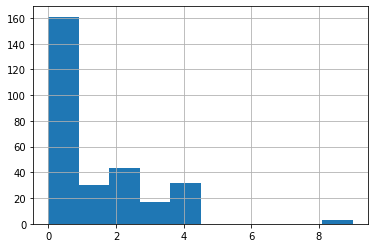

In [26]:
data_missing_ocupante['INJ_SEV'].hist()

In [27]:
data_missing_ocupante.isnull().sum().sort_values(ascending=False)

DR_DRINK      286
M_HARM        286
BUS_USE       286
TRAV_SP       286
UNDERIDE      286
             ... 
ALC_STATUS      0
ATST_TYP        0
ALC_RES         0
DRUGS           0
ST_CASE         0
Length: 164, dtype: int64

Para evitar a perda de informações relevantes (caso as linhas com ausência de dados fossem excluídas) vamos preencher os valores ausentes da base data_missing_ocupante com a média de cada um dos respectivos campos (desde que seja um campo numérico), calculados a partir da base completa.

In [28]:
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = list(data_complete.select_dtypes(include=numerics).columns)


medias = round(data_complete[numerical].mean(),0)

medias

ST_CASE       276527.0
VE_TOTAL           2.0
PVH_INVL           0.0
PEDS               0.0
PERNOTMVIT         0.0
                ...   
PCRASH4            2.0
PCRASH5            2.0
ACC_TYPE          46.0
DEATHS             1.0
DR_DRINK           0.0
Length: 161, dtype: float64

In [29]:
data_missing_ocupante.fillna(medias, inplace=True)

C:\Users\flavi\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Além dos campos numéricos, temos também alguns campos não numéricos

In [30]:
not_numerical = list(data_complete.select_dtypes(exclude=numerics).columns)

data_complete[not_numerical]

,RAIL,MCARR_I2,MCARR_ID
0,0000000,000000000,00000000000
1,0000000,000000000,00000000000
2,0000000,000000000,00000000000
3,0000000,000000000,00000000000
4,0000000,000000000,00000000000
...,...,...,...
81615,0000000,0,0
81616,0000000,0,0
81617,0000000,0,0
81618,0000000,260341,57000260341


Os campos MCARR_I2 e MCARR_ID trazem a identificação de certos veículos (Caminhões médios e pesados, Ônibus, Caminhões ou vans de transporte de produtos perigosos,...). Então não faz sentido calcular média de um valor de identificação, portanto removeremos este campos de todas as três bases. O campo MCARR_ID também faz parte do mesmo grupo, não apareceu neste levantamento por conter valores numéricos.

O campo RAIL informa se o acidente ocorreu próximo à uma travessia de linha ferroviária, iremos desconsiderar esta informação por não fazer sentido replicar estes dados para os demais registros.

Além destes campos, entende-se que também não faz sentido calcular a média do DR_ZIP (CEP), até porque há outras informações sobre localização, neste caso também desconsideraremos este campo.

In [31]:
del data_complete['MCARR_I2']
del data_complete['MCARR_I1']
del data_complete['MCARR_ID']
del data_complete['RAIL']
del data_complete['DR_ZIP']

del data_missing_ocupante['MCARR_I2']
del data_missing_ocupante['MCARR_I1']
del data_missing_ocupante['MCARR_ID']
del data_missing_ocupante['RAIL']
del data_missing_ocupante['DR_ZIP']

del data_missing_nao_ocupante['MCARR_I2']
del data_missing_nao_ocupante['MCARR_I1']
del data_missing_nao_ocupante['MCARR_ID']
del data_missing_nao_ocupante['RAIL']
del data_missing_nao_ocupante['DR_ZIP']

In [32]:
data_missing_ocupante.isnull().sum().sort_values(ascending=False)

DR_DRINK    0
DEATHS      0
REST_USE    0
SEAT_POS    0
INJ_SEV     0
           ..
HAZ_PLAC    0
HAZ_INV     0
CARGO_BT    0
V_CONFIG    0
ST_CASE     0
Length: 160, dtype: int64

#### Não Ocupante

Vamos analisar a distribuição do campo "INJ_SEV" nos dados de Não Ocupantes

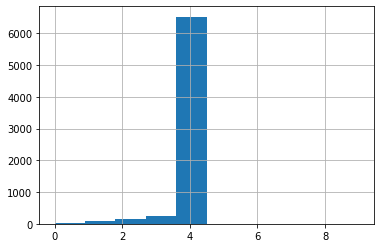

In [33]:
data_missing_nao_ocupante['INJ_SEV'].hist()

Para estes casos entende-se que será necessário preencher o campos referentes às informações dos veículos com valores que identifiquem a não aplicabilidade.

Para isso, vamos analisar o valor máximo de cada um dos campos da base completa e criar uma nova categoria a partir da soma de uma unidade.

In [34]:
categorias_nao_ocupante = data_complete.max() + 1

In [35]:
data_missing_nao_ocupante.fillna(categorias_nao_ocupante, inplace=True)

In [36]:
data_missing_nao_ocupante.isnull().sum().sort_values(ascending=False)

DR_DRINK    0
DEATHS      0
REST_USE    0
SEAT_POS    0
INJ_SEV     0
           ..
HAZ_PLAC    0
HAZ_INV     0
CARGO_BT    0
V_CONFIG    0
ST_CASE     0
Length: 160, dtype: int64

Após tratar os registros nulos, vamos novamente juntar as bases, empilhando-as.

In [37]:
data_complete_new = data_complete.append(data_missing_ocupante.append(data_missing_nao_ocupante))

In [38]:
data_complete_new

,ST_CASE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,CITY,YEAR,DAY_WEEK,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,10001,1,0,0,0,1,1,0,2015,5,...,0.0,0.0,14.0,13.0,99.0,1.0,4.0,1.0,1.0,1.0
1,10002,1,0,0,0,1,1,0,2015,5,...,0.0,0.0,14.0,6.0,1.0,4.0,4.0,7.0,1.0,0.0
2,10003,1,0,0,0,2,2,0,2015,5,...,0.0,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
3,10003,1,0,0,0,2,2,0,2015,5,...,0.0,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
4,10004,1,0,0,0,1,1,0,2015,1,...,0.0,0.0,14.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81391,560031,19,1,1,3,25,27,0,2015,2,...,100.0,10.0,100.0,100.0,100.0,10.0,10.0,100.0,11.0,2.0
81415,560042,1,0,1,1,1,1,710,2015,6,...,100.0,10.0,100.0,100.0,100.0,10.0,10.0,100.0,11.0,2.0
81424,560048,1,0,1,1,1,1,0,2015,4,...,100.0,10.0,100.0,100.0,100.0,10.0,10.0,100.0,11.0,2.0
81438,560052,1,0,1,1,2,2,0,2015,5,...,100.0,10.0,100.0,100.0,100.0,10.0,10.0,100.0,11.0,2.0


## Tratamentos Adicionais

Remoção de campos que trazem informações de óbito

In [39]:
del data_complete_new ['DEATH_TM']
del data_complete_new ['DEATH_YR']
del data_complete_new ['DEATH_MO']
del data_complete_new ['DEATH_DA']
del data_complete_new ['DEATH_HR']
del data_complete_new ['DEATH_MN']
del data_complete_new ['LAG_HRS']
del data_complete_new ['LAG_MINS']
del data_complete_new ['RACE']
del data_complete_new ['HISPANIC']
del data_complete_new ['WORK_INJ']
del data_complete_new ['DOA']
del data_complete_new ['DEATHS']
del data_complete_new ['FATALS']


Os registros que possuem INJ_SEV igual a 5 (Injured, Severity Unknown), 6 (Died prior to crash), 8 (Not Reported) e 9 (Unknown) serão removidos.

In [41]:
data_complete_new = data_complete_new.query("INJ_SEV < 5")

Verificando as novas dimensões do dataset

In [42]:
data_complete_new.shape

(80571, 146)

In [43]:
data_complete_new.to_csv('data_complete_new.csv', header = True, index = False)